In [1]:
#Author: Shadab Alam : salam@roe.ac.uk
#Create a file to list all the parameters of cosmology in Abacus simulation
from __future__ import print_function

#####importing the necessary libraries
#To make the plots inline otherwise it will make seperate figure
%matplotlib inline 
#for high resolution plot outputs
%config InlineBackend.figure_format = 'retina'

import numpy as np

import os
import sys

#latex display
from IPython.display import Latex


####plottinng library and setting
import pylab as pl
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})


# Intro:
This notebook provide basic function to load the parameters and measurements and make some preliminary plots.
We are using Abacus Nbody simulation to study the ability to cosmological parameter sensitivity on various observables. You can learn more about Abacus suites of Nbody simulation here: https://lgarrison.github.io/AbacusCosmos/simulations/

We have taken the 720 Mpc/h box from Abacus suit and created mock galaxy catalogue representing GAMA sample at low redshift with r band absolute limit of -21. The 40 different cosmology are populated and should be used for this study. The over all goal will to understand the information content in different observable for which we will use fisher technique. Please read section 5 of https://arxiv.org/pdf/1911.11158.pdf paper for description of how such method can be used.

Our longer term goal will be to use projected correlation function (wp), multipole moments (xi_ell), Vornois Volume Function (VVF) and Void probability function (VPF) in this exrcise. 

Currently we have wp, and xis024 available which will be our starting point.

So, the notebook provide how to access, load and plot these measurements including corresponding cosmological parameters.

The clustering file structure:
For each sim we assign a simname which is either planck or interget with two digit (00-39) and file names are:
<simaname>-wpxis024xi2dsmall-logr.txt
    
The file consists of mean measurement as well as jacknife realization. For a description of jackknife realizations please look at the tutorial on LSS:

The header of the file is as follows:
#wp xir-small-mu0 xi0 xir-small-mu1 xi2 xir-small-mu2 xi4 with jacknife NJN=225
#njn= 225
#nwp= 25
#nsxi= 6
#nssmall= 5
#r(Mpc/h) mean sigma All jacknifecolumns

# Function to get he cosmological parameters and measurement file names

In [2]:
def GetAbacus_param(simnum=0,rootdir='',boxsize=720,redshift='z0.100'):
    '''Reads the parameters for sim num from a file list'''
    parlist_file=rootdir+'AbacusCosmos_%dbox_cosmo.parlist'%(boxsize)
    
    #dictionary to hold parameters and returns
    pardic={}
    
    #read param lists
    lines=open(parlist_file).readlines()
    for tt,tline in enumerate(lines):
        if('#params' in tline):
            plist_str=tline[:-1].split(':')[-1]
            tspl_plist=plist_str.split(',')
            break
    
    if(simnum=='planck'):
        simname=simnum
        for tt,tline in enumerate(lines):
            if('#planck' in tline):
                tspl=tline.split()
                for ii, par in enumerate(tspl_plist):
                    if(ii==0):
                        pardic[par]=simnum
                    else:
                        pardic[par]=np.float(tspl[ii])
    else:
        simname=str(simnum).zfill(2)
        #load the values of parameters
        data=np.loadtxt(parlist_file)
        #select the appropriate sim
        ind_sel=np.where(data[:,0]==simnum)[0][0]
        #populate the dictionary for selected sim num

        for ii, par in enumerate(tspl_plist):
            pardic[par]=data[ind_sel,ii]

            
            
    #halo_dir=halo_file(rootdir=rootdir,simname=simname,boxsize=boxsize,redshift=redshift)
    #pardic['halo_dir']=halo_dir
    
    clustering_file=rootdir+simname+'-wpxis024xi2dsmall-logr.txt'
    pardic['clustering_file']=clustering_file
    pardic['simname']=simname
    
    return pardic

rootdir='WPXIS024XI2DSMALL/AbacusCosmos_720box/'
GetAbacus_param(simnum='planck',rootdir=rootdir,boxsize=720,redshift='z0.100')

{'simNUM': 'planck',
 'H0': 67.26,
 'N_eff': 3.04,
 'Omega_M': 0.31415319,
 'ZD_Seed': 7272.0,
 'ns': 0.9652,
 'ombh2': 0.02222,
 'omch2': 0.1199,
 'omnuh2': 0.0,
 'sigma_8': 0.83,
 'w0': -1.0,
 'clustering_file': 'WPXIS024XI2DSMALL/AbacusCosmos_720box/planck-wpxis024xi2dsmall-logr.txt',
 'simname': 'planck'}

# Function to load the clustering measurement

In [3]:
def load_clustering(simnum,rootdir=''): 
    '''loads the clustering measurements'''
    
    #first load the basic parameters
    res_dic=GetAbacus_param(simnum=simnum,rootdir=rootdir,boxsize=720,redshift='z0.100')
    
    res_dic['xidata']=np.loadtxt(res_dic['clustering_file'])
    
    #loading the details of data vector header
    tmpline=open(res_dic['clustering_file'],'r').readlines()
    ngot=0
    for ii, tline in enumerate(tmpline):
        if('#njn=' in tline):
            res_dic['njn']=np.int(tline.split()[1]);
        elif('#nwp=' in tline):
            res_dic['nwp']=np.int(tline.split()[-1])
            ngot=ngot+1
        elif('#nsxi=' in tline):
            res_dic['nsxi']=np.int(tline.split()[-1])
            ngot=ngot+1
        elif('#nssmall=' in tline):
            res_dic['nssmall']=np.int(tline.split()[-1])
            ngot=ngot+1
        elif('#order=' in tline):
            res_dic['stats_order']=tline.split()[1:];

        
        #if(ngot>=2 and smallscale_split==0):
        #    break
        if(ngot>=5):
            break
            
    res_dic['beg_index']=0
    
    return res_dic

simnum_list=['planck',0,1,2,3,4,5,6,7,8,9,10,
            11,12,13,14,15,16,17,18,19,
            20,21,22,23,24,25,26,27,28,30,
            30,31,32,33,34,35,36,37,38,39]
res_sims={}
for ss,simnum in enumerate(simnum_list):
    res_sims[simnum]=load_clustering(simnum,rootdir=rootdir)

# Functions to plot the clustering measurement

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


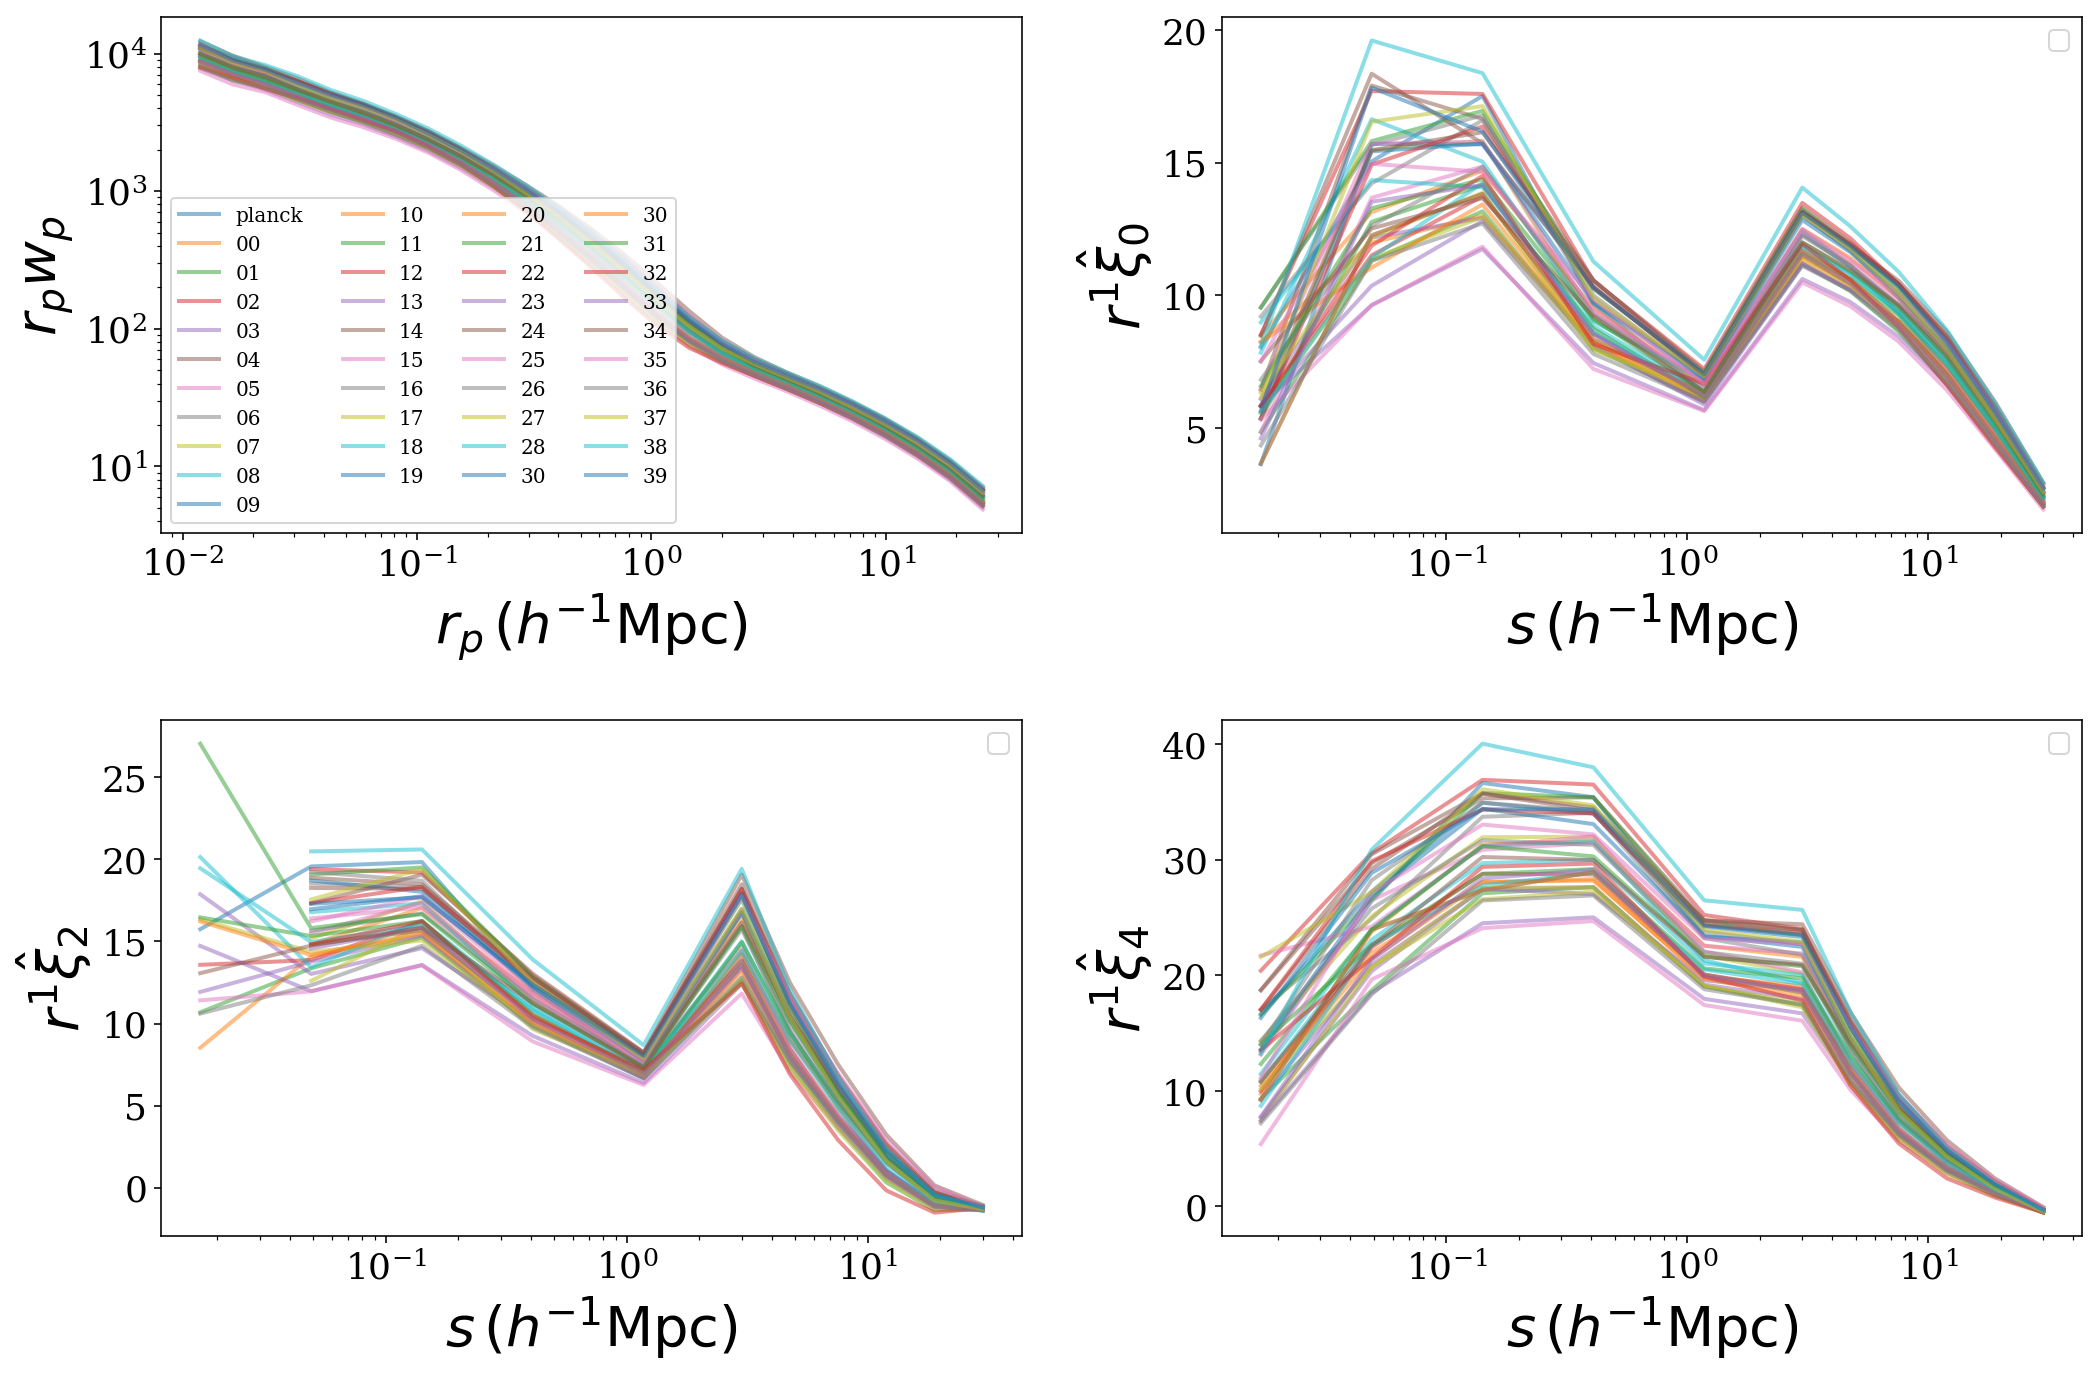

In [14]:
def plot_clustering(indic,axarr,color=None,werr=False,
                    marker='-',fmt='o',lab=None,frp_pow=1,r2tag='r^1',refdic={},axlabel=False):
    '''plots the clustering results'''
    
    tdic=indic['xidata']
    
    if(refdic=={}):
        refwpxi=np.ones(tdic.shape[0]);
    else:
        refwpxi=refdic['xidata']

    
    #first make the wp plot
    #The bi and ei decide the range of wp indices
    bi=indic['beg_index']; ei=indic['beg_index']+indic['nwp']
    frp=np.power(tdic[bi:ei,0],frp_pow)
    xval=np.power(10,np.log10(tdic[bi:ei,0]))
    if(werr==True):
        axarr[0].errorbar(xval,frp*tdic[bi:ei,1]/refwpxi[bi:ei],
                            yerr=frp*tdic[bi:ei,2]/refwpxi[bi:ei],
                  fmt=fmt,lw=2,color=color,markersize=6,mfc='w',label=lab)
    else:
        axarr[0].plot(xval,frp*tdic[bi:ei,1]/refwpxi[bi:ei],lw=2,color=color,alpha=0.5,label=lab)

    #print(simnum,bi,ei)

    for ii,pole in enumerate([0,2,4]):
        #decide the range of various indices of multipole moments
        ind1=indic['beg_index']+indic['nwp']+(ii*(indic['nsxi']+indic['nssmall'])); 
        ind2=ind1+indic['nsxi']+indic['nssmall']
#         print('pole:',pole,ind1,ind2)
        if(r2tag==''):
            rpow=0
        elif(r2tag=='r^1'):
            rpow=1
        else:
            rpow=2

        r2=np.power(tdic[ind1:ind2,0],rpow)
        #plot of data
        #xval=tdic[ind1:ind2,0]
        xval=np.power(10,np.log10(tdic[ind1:ind2,0]))
        if(werr==True):
            axarr[ii+1].errorbar(xval,r2*tdic[ind1:ind2,1]/refwpxi[ind1:ind2],
                                   yerr=r2*tdic[ind1:ind2,2]/refwpxi[ind1:ind2],
                             fmt=fmt,lw=2,color=color,markersize=6,mfc='w')#,label='M_r>-%d'%Mr)
        else:
            axarr[ii+1].plot(xval,r2*tdic[ind1:ind2,1]/refwpxi[ind1:ind2],
                             lw=2,color=color,alpha=0.5)
            
    #labeling etc
    if(axlabel==True):
        #labeling the plot
        pl.sca(axarr[0]);
        pl.xlabel(r'$r_p \,(h^{-1}{\rm Mpc})$',fontsize=28)
        pl.ylabel(r'$r_p w_p$',fontsize=28)
        pl.xscale('log');
        if(refdic=={}):
            pl.yscale('log')
        pl.legend(fontsize=13,ncol=2,loc=2)

        for ii,pole in enumerate([0,2,4]):
            pl.sca(axarr[ii+1])
            pl.xlabel(r'$s \,(h^{-1}{\rm Mpc})$',fontsize=28)

            pl.ylabel(r'$%s \hat{\xi}_%d$'%(r2tag,pole),fontsize=28)
            pl.xscale('log')
            #pl.yscale('symlog')
            #pl.ylim([0,500])
            if(refdic=={} and r2tag==''):
                pl.yscale('log')
            elif(refdic!={}):
                if(pole>0):
                    pl.ylim([0,2])

            pl.legend(fontsize=13)

nrow=2;ncol=2
fig,axarr=pl.subplots(nrow,ncol,sharex=False,sharey=False,figsize=(15,nrow*5))
axarr=axarr.reshape(axarr.size)

refdic={}
r2tag='r^1'
for ss,simnum in enumerate(simnum_list):
    res_dic=res_sims[simnum]
    if(ss==0):
        axlabel=True
    else:
        axlabel=False
    plot_clustering(res_dic,axarr,frp_pow=0,r2tag=r2tag,color=None,werr=False,
                    marker='-',lab=res_dic['simname'],refdic=refdic,axlabel=axlabel)



pl.sca(axarr[0])
pl.legend(fontsize=10,ncol=4)
pl.tight_layout()


# Covariance and Correlation Matrices
Added on 14/04/2020 by Devang Haresh Liya

In [22]:
#Modified on 15/04/2020
def plot_cov_corr(sim_dic, lab, nrow, ncol, plotcov=False, saveplot=False, analysis_dir=None):
    '''
    Plot and save covariance and correlation matrices
    Input:
    --------
    sim_dic: A dictionary with simulation parameters and xidata
    lab: labels for various statistics for which the covariance and correlation matrices are to be constructed
    nrow: number of rows in the figure
    ncol: number of columns in the figure
    plotcov: Whether to plot covariance matrix
    saveplot: Whether to save the plots (plots will not be displayed if True)
    analysis_dir: Directory to save the plots
    '''
    
    if saveplot and analysis_dir==None:
        print("Exiting the function. Please give a directory to save the plots.")
        return 4
    
    if saveplot:
        #Create necessary sub-directories
        cov_dir = analysis_dir + 'cov_matrices/'
        corr_dir = analysis_dir + 'corr_matrices/'
        if not os.path.isdir(cov_dir):
            !mkdir $cov_dir
        if not os.path.isdir(corr_dir):
            !mkdir $corr_dir
    
    fig_corr, axarr_corr = pl.subplots(nrow,ncol,sharex=False,sharey=False,figsize=(8,nrow*4))
    fig_corr.suptitle('simname: ' + sim_dic['simname'], size=28)
    axarr_corr=axarr_corr.reshape(axarr_corr.size)

    if plotcov:
        fig_cov, axarr_cov = pl.subplots(nrow,ncol,sharex=False,sharey=False,figsize=(8,nrow*4))
        fig_cov.suptitle('simname: ' + sim_dic['simname'], size=28)
        axarr_cov=axarr_cov.reshape(axarr_cov.size)
    
    for i, labi in enumerate(lab):        
        #Plot wp matrix first 
        if i == 0:
            #covariance matrix
            covxi = (sim_dic['njn']-1)*np.cov(
                sim_dic['xidata'][sim_dic['beg_index']:sim_dic['beg_index']+sim_dic['nwp'],4:])
            
            if plotcov:
                axarr_cov[i].imshow(covxi)
                axarr_cov[i].set_title('Covariance matrix of ' + labi)
            
            #correlation matrix
            corrxi = np.copy(covxi)
            for ii in range(0,covxi.shape[0]):
                for jj in range(0,covxi.shape[1]):
                    corrxi[ii,jj] = covxi[ii,jj]/(np.sqrt(covxi[ii,ii])*np.sqrt(covxi[jj,jj]))
                    
            #plot
            axarr_corr[i].imshow(corrxi,vmin=-1,vmax=1,cmap='seismic')
            #Possible solution: https://stackoverflow.com/questions/2643953/attributeerror-while-adding-colorbar-in-matplotlib
            axarr_corr[i].set_title('correlation matrix of ' + labi)
            
        else:
            ind1 = sim_dic['beg_index'] + sim_dic['nwp'] + (i-1)*(sim_dic['nssmall'] + sim_dic['nsxi']); 
            ind2 = ind1 + sim_dic['nsxi'] + sim_dic['nssmall']
#             print(ind1, ind2, sim_dic['xidata'][ind1:ind2,4:].shape)
            
            #covariance matrix
            covxi = (sim_dic['njn']-1)*np.cov(sim_dic['xidata'][ind1:ind2,4:])
            
            if plotcov:
                axarr_cov[i].imshow(covxi)
                axarr_cov[i].set_title('Covariance matrix of ' + labi)
            
            #correlation matrix
            corrxi = np.copy(covxi)
            for ii in range(0,covxi.shape[0]):
                for jj in range(0,covxi.shape[1]):
                    corrxi[ii,jj] = covxi[ii,jj]/(np.sqrt(covxi[ii,ii])*np.sqrt(covxi[jj,jj]))
                    
            #plot
            axarr_corr[i].imshow(corrxi,vmin=-1,vmax=1,cmap='seismic')  
            axarr_corr[i].set_title('correlation matrix of ' + labi)
    
    if saveplot:
        fig_corr.savefig(corr_dir + str(sim_dic['simname']) + '.png')
        pl.close()
        if plotcov:
            fig_cov.savefig(cov_dir + str(sim_dic['simname']) + '.png')
            pl.close()


plank = res_sims['planck']
lab = [r'$w_p$', r'$\hat{\xi}_0$', r'$\hat{\xi}_2$', r'$\hat{\xi}_4$']
            
nrow=2;ncol=2

plot_cov_corr(sim_dic=plank, lab=lab, nrow=nrow, ncol=ncol, plotcov=True, saveplot=False, analysis_dir='')

In [ ]:
lab = [r'$w_p$', r'$\hat{\xi}_0$', r'$\hat{\xi}_2$', r'$\hat{\xi}_4$']
nrow=2;ncol=2

for simnum in simnum_list:
    print('simnum:', simnum)
    plot_cov_corr(sim_dic=res_sims[simnum], lab=lab, nrow=nrow, ncol=ncol, plotcov=True, 
                  saveplot=True, analysis_dir='')

Added on 15/04/2020

In [ ]:
#15/04/2020
def plot_cross_correlation(sim_dic, statistics, plotcov=False, saveplot=False, analysis_dir=None):
    '''
    Plot and save cross-covariance and cross-correlation matrices
    Input:
    --------
    sim_dic: A dictionary with simulation parameters and xidata
    statistics: list of statistics between whome cross-correlation matrix is to be constructed
    plotcov: Whether to plot covariance matrix
    saveplot: Whether to save the plots (plots will not be displayed if True)
    analysis_dir: Directory to save the plots
    '''
    
    if saveplot and analysis_dir==None:
        print("Exiting the function. Please give a directory to save the plots.")
        return 4
    
    if saveplot:
        #Create necessary sub-directories
        cov_dir = analysis_dir + 'cov_matrices/'
        corr_dir = analysis_dir + 'corr_matrices/'
        if not os.path.isdir(cov_dir):
            !mkdir $cov_dir
        if not os.path.isdir(corr_dir):
            !mkdir $corr_dir
    
    #Make a dictionary of xidata segregated by statistics
    seg = {}
    seg['wp'] = sim_dic['xidata'][sim_dic['beg_index']:sim_dic['beg_index']+sim_dic['nwp'],4:]
    for ii, pole in enumerate([0,2,4]):
        ind1 = sim_dic['beg_index'] + sim_dic['nwp'] + ii*(sim_dic['nssmall'] + sim_dic['nsxi'])
        ind2 = ind1 + sim_dic['nsxi'] + sim_dic['nssmall']
        seg['xi'+str(pole)] = sim_dic['xidata'][ind1:ind2,4:]
#         print('pole:', pole, ind1, ind2)
#     for key in seg.keys():
#         print(key, seg[key].shape)
    
    pulm_cov = seg[statistics[0]]
    ts = statistics[0]
    for statistic in statistics[1:]:
        pulm_cov = np.row_stack([pulm_cov, seg[statistic]])
        ts = ts + ', ' + statistic
    
    covxi = (sim_dic['njn']-1)*np.cov(pulm_cov)
    
    if plotcov:
        pl.figure(figsize=(8,8))
        pl.imshow(covxi)
        pl.colorbar()
        pl.title('covariance matrix of ' + ts + ' (simname=' + sim_dic['simname'] + ')')
        if saveplot:
            pl.savefig(cov_dir + str(sim_dic['simname']) + '.png')
            pl.close()
    
    corrxi = np.copy(covxi)
    for ii in range(0, covxi.shape[0]):
        for jj in range(0, covxi.shape[1]):
            corrxi[ii,jj] = covxi[ii,jj]/(np.sqrt(covxi[ii,ii])*np.sqrt(covxi[jj,jj]))

    pl.figure(figsize=(8,8))
    pl.imshow(corrxi,vmin=-1,vmax=1,cmap='seismic')
    pl.colorbar()
    pl.title('correlation matrix of ' + ts + ' (simname=' + sim_dic['simname'] + ')')
    if saveplot:
        pl.savefig(corr_dir + str(sim_dic['simname']) + '.png')
        pl.close()
        
plank = res_sims[0]
plot_cross_correlation(sim_dic=plank, statistics=['xi0', 'xi2', 'xi4'], 
                       plotcov=True, saveplot=False, analysis_dir='')

In [ ]:
for simnum in simnum_list:
    print('simnum:', simnum)
    plot_cross_correlation(sim_dic=res_sims[simnum], statistics=['wp', 'xi0', 'xi2', 'xi4'], 
                       plotcov=True, saveplot=True, analysis_dir='')

# Study of variation in statistic functions
Added on 10/05/2020

In [5]:
def generate_stat_matrix_paramdict(res_sims, simnum_list, paramlist, avg_index=None):
    '''
    Calculate the derivative matrix for given parameters
    Input:
    --------
    res_sims: dictionary containing the simulation data
    simnum_list
    paramlist: list of parameters of interest
    avg_index (default=None): end indices to combine the distance bins along (by averaging)
    '''
    
    statistic = []
    paramdict = {}

    sim_dic = res_sims['planck']
    bi = sim_dic['beg_index'] 
    ei = sim_dic['beg_index'] + sim_dic['nwp']
    statistic.append(res_sims[simnum_list[0]]['xidata'][bi:ei,0])

    for sim_num in simnum_list:
        sim_dic = res_sims[sim_num]
        statistic.append(sim_dic['xidata'][bi:ei,1])
        for param in paramlist:
            paramdict.setdefault(param, []).append(sim_dic[param])

    statistic = np.array(statistic)
    
    if avg_index != None:
        print("List of index provided. Combining the distance bins")
        #----Combine distance bins (average)----
        statistic_avg = []
        prev = 0
        for i in avg_index:
            statistic_avg.append(np.mean(statistic[:,prev:i], axis=1))
            prev = i
        statistic_avg = np.array(statistic_avg).T #Transpose to get same format as statistic
        return paramdict, statistic_avg
        #--------
    else:
        print("Using the original bins")
        return paramdict, statistic

def fit_one_parameter(paramdict, param, statistic, order, visualize=False):
    param_values = np.array(paramdict[param])
    if order == 1:
        fitted = np.polyfit(param_values, statistic[1:], 1)
        if visualize:
            pl.figure(figsize=(12,8))
            #i is scale
            for i in range(statistic.shape[1]):
                pl.scatter(param_values, statistic[1:,i], 
                           label=str(round(statistic[0][i], 6)),lw=0.4)
                pl.plot(param_values, fitted[0,i]*param_values + fitted[1,i])
                
            pl.legend(title='r (Mpc/h)')
            pl.xlabel(param, fontsize=22)
            pl.ylabel(r'$w_p$', fontsize=22)
        return fitted[0,:]
            
    elif order == 2:
        fitted = np.polyfit(param_values, statistic[1:], 2)
        if visualize:
            pl.figure(figsize=(12,8))
            #i is scale
            for i in range(statistic.shape[1]):
                pl.scatter(param_values, statistic[1:,i], 
                           label=str(round(statistic[0][i], 6)),lw=0.4)
                pl.plot(param_values, fitted[0,i]*param_values*param_values
                        + fitted[1,i]*param_values + fitted[2,i])
                
            pl.legend(title='r (Mpc/h)')
            pl.xlabel(param, fontsize=22)
            pl.ylabel(r'$w_p$', fontsize=22)
            
    else:
        print("Exiting. Possible orders of polynomial are only 1 or 2.")
        return 3

Using the original bins


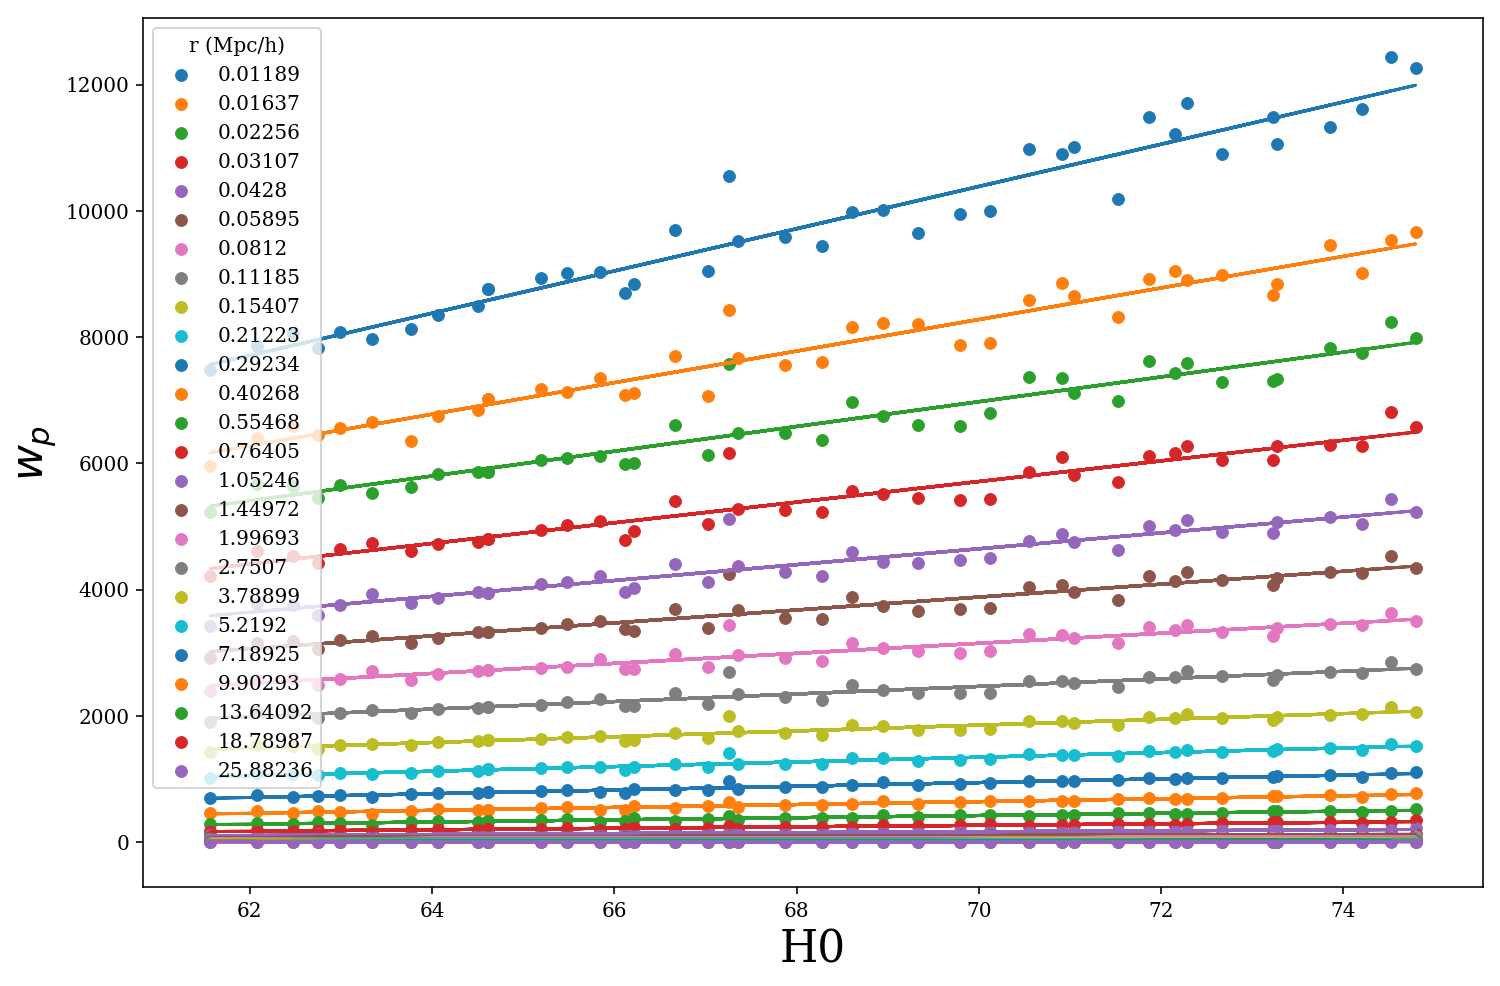

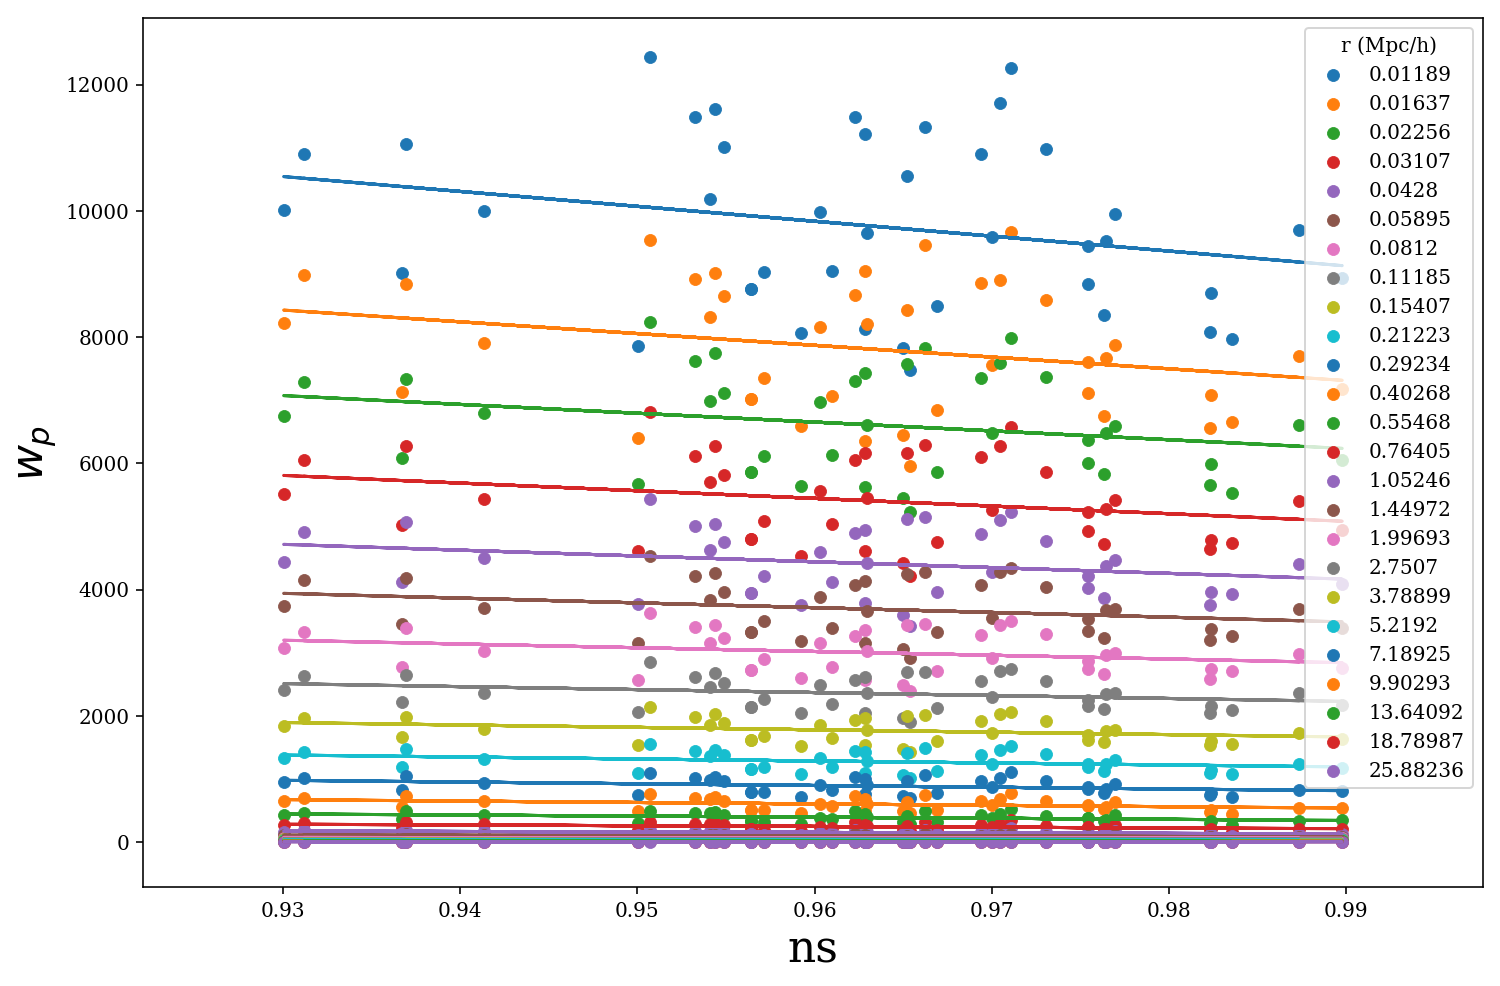

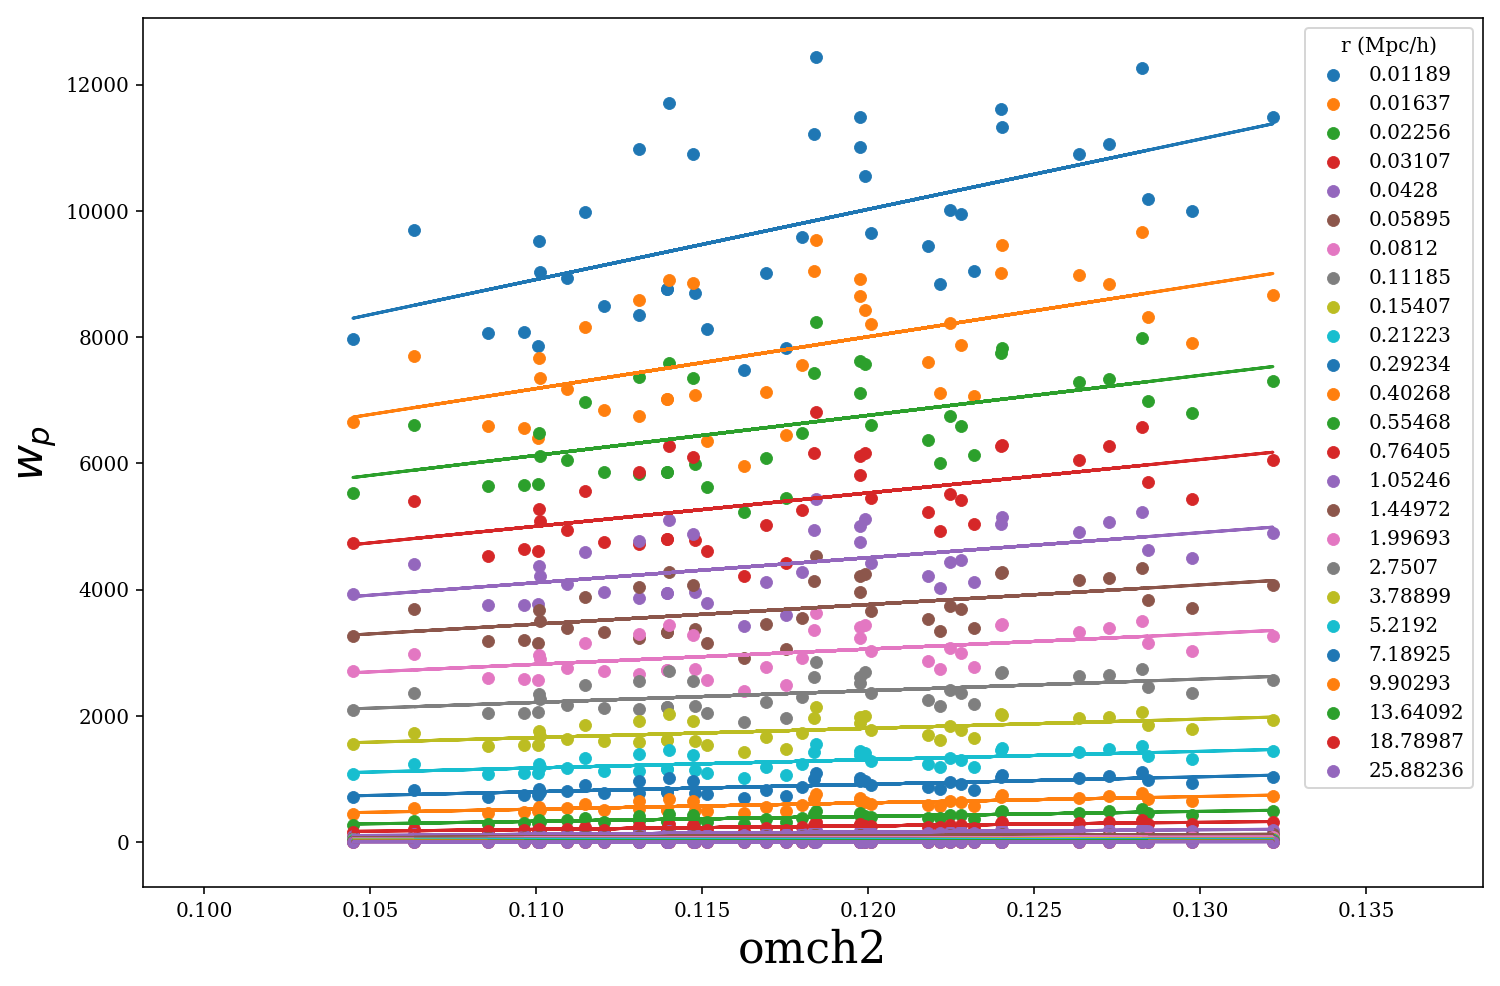

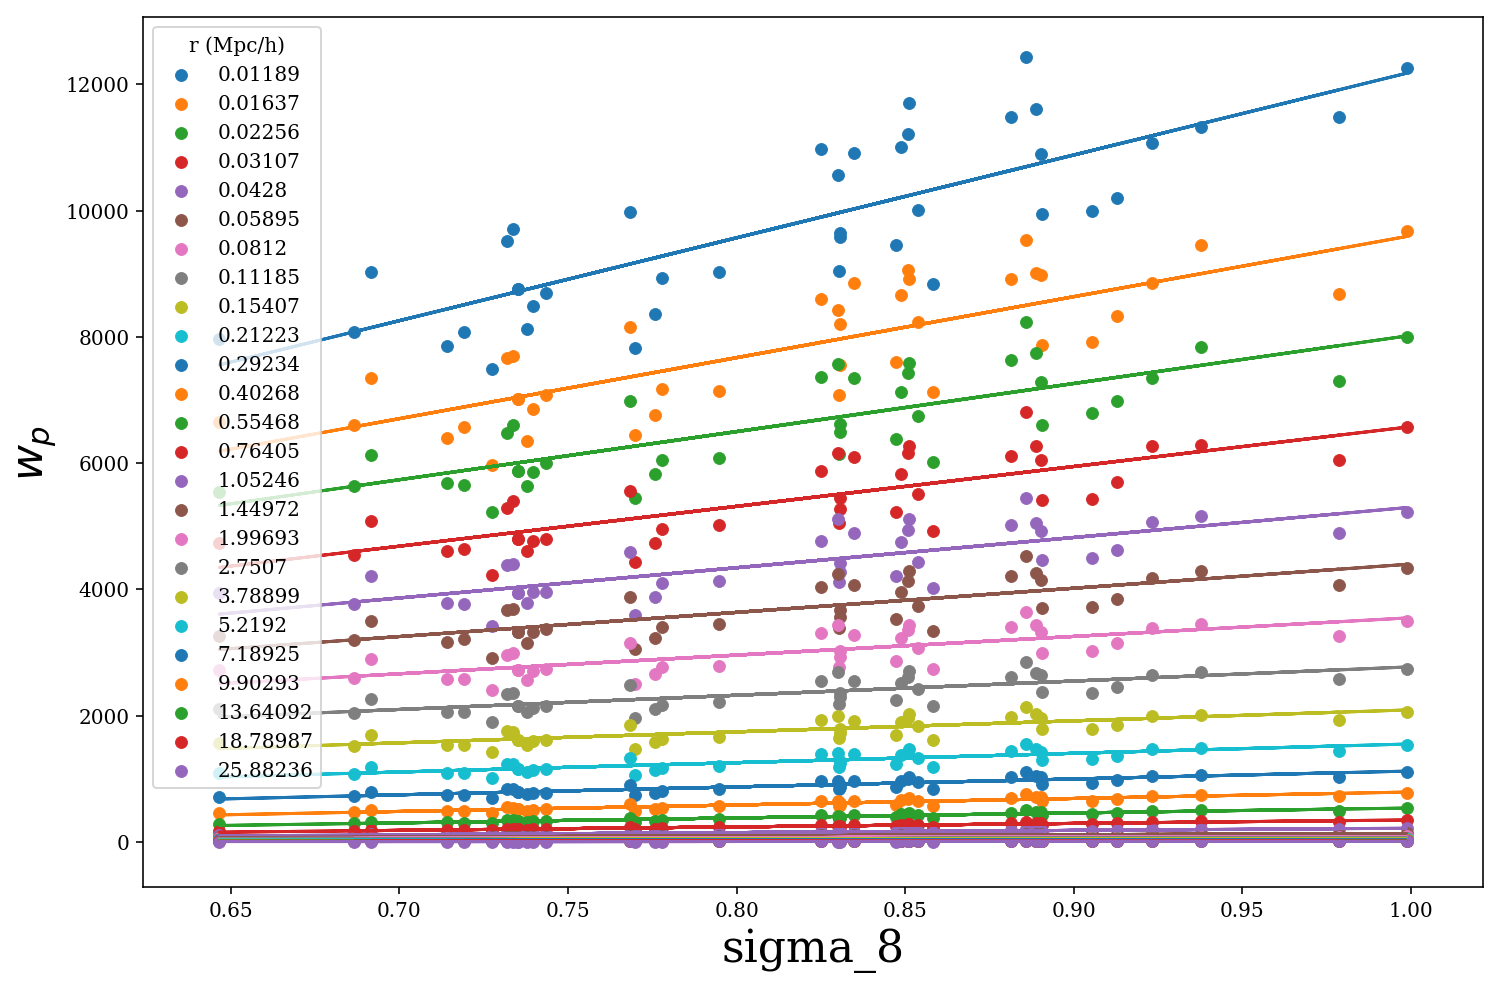

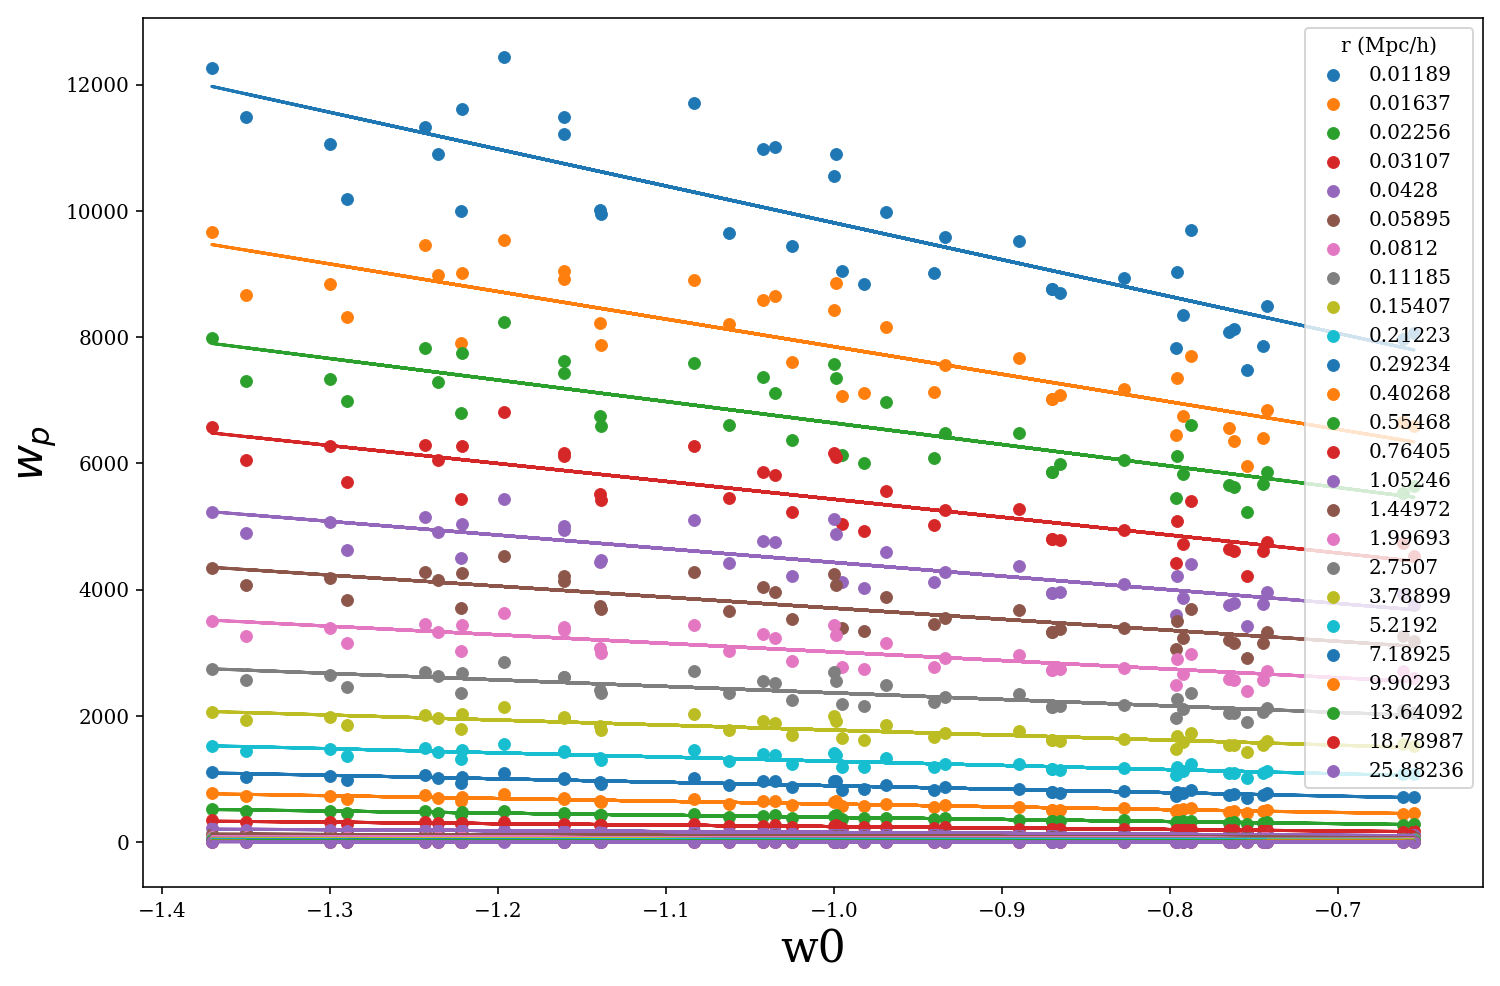

In [5]:
paramlist = ['H0', 'N_eff', 'Omega_M','ns', 'ombh2', 'omch2', 'sigma_8', 'w0']
paramdict, statistic = generate_stat_matrix_paramdict(res_sims, simnum_list, paramlist, avg_index=None)
# fit_one_parameter(paramdict, 'H0', statistic, 1, visualize=True)

derivative_matrix = []

for i, param in enumerate(paramlist):
    derivative_matrix.append(fit_one_parameter(paramdict, param, statistic, order=1, visualize=True))

derivative_matrix = np.array(derivative_matrix)

Text(0, 0.5, '$log(|\\frac{dw_p}{dParameter}|)$')

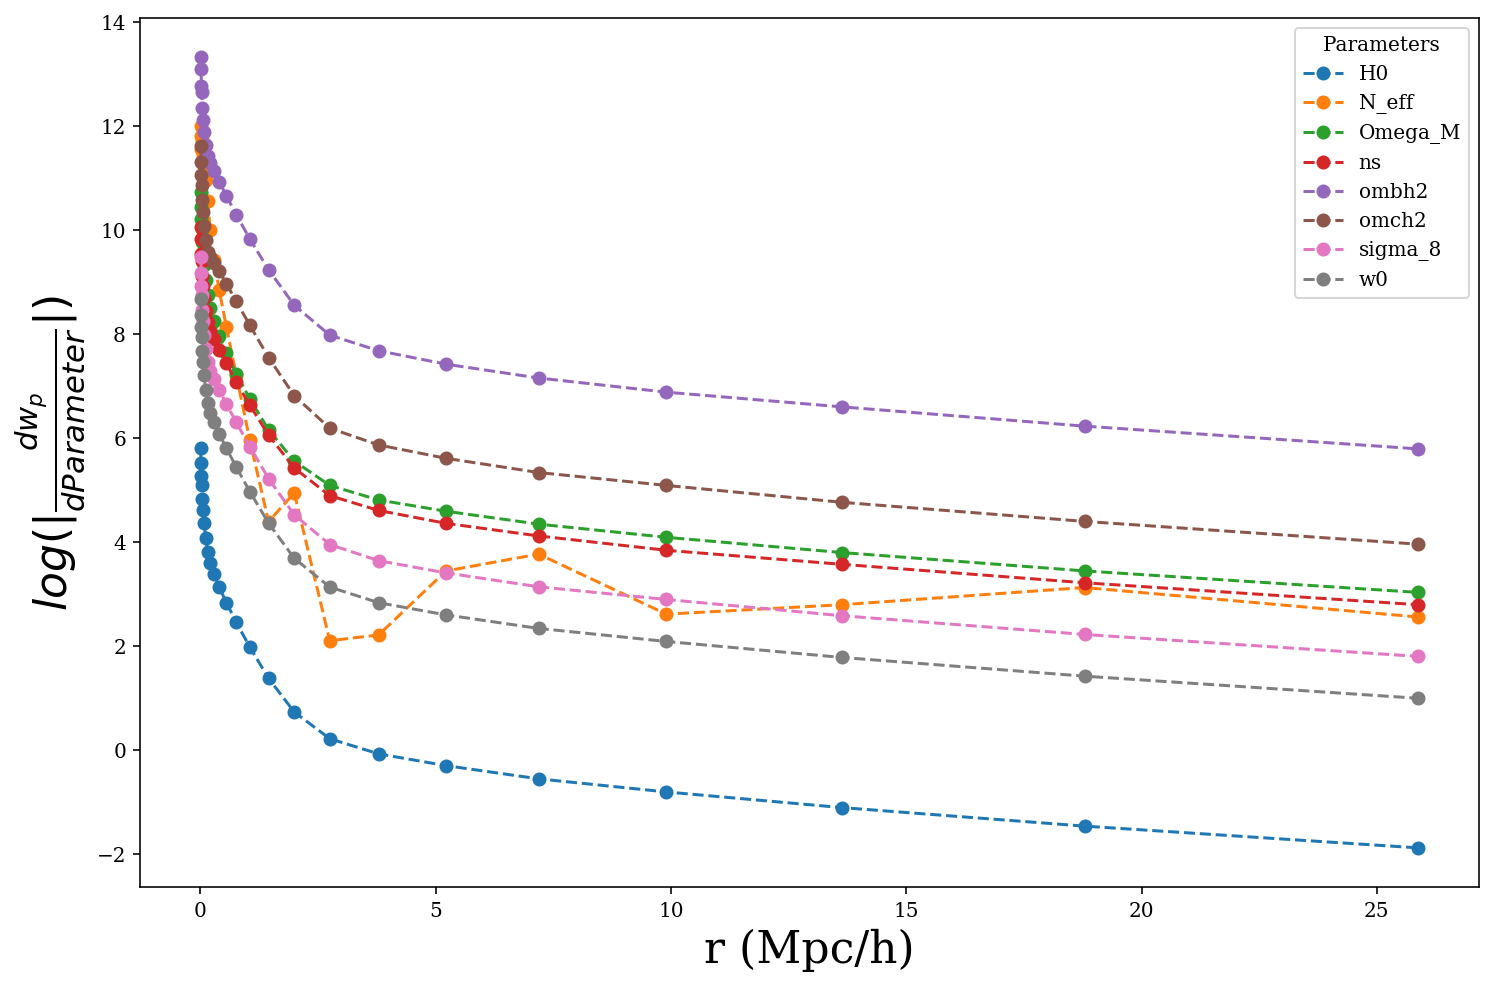

In [6]:
pl.figure(figsize=(12,8))

for i, param in enumerate(paramlist):
    pl.plot(statistic[0,:], np.log(np.abs(derivative_matrix[i])), 'o--', label=param)

pl.legend(title = 'Parameters')
pl.xlabel('r (Mpc/h)', fontsize=22)
pl.ylabel(r'$log(|\frac{dw_p}{dParameter}|)$', fontsize=22)

Text(0, 0.5, '$\\frac{dw_p}{dParameter}$')

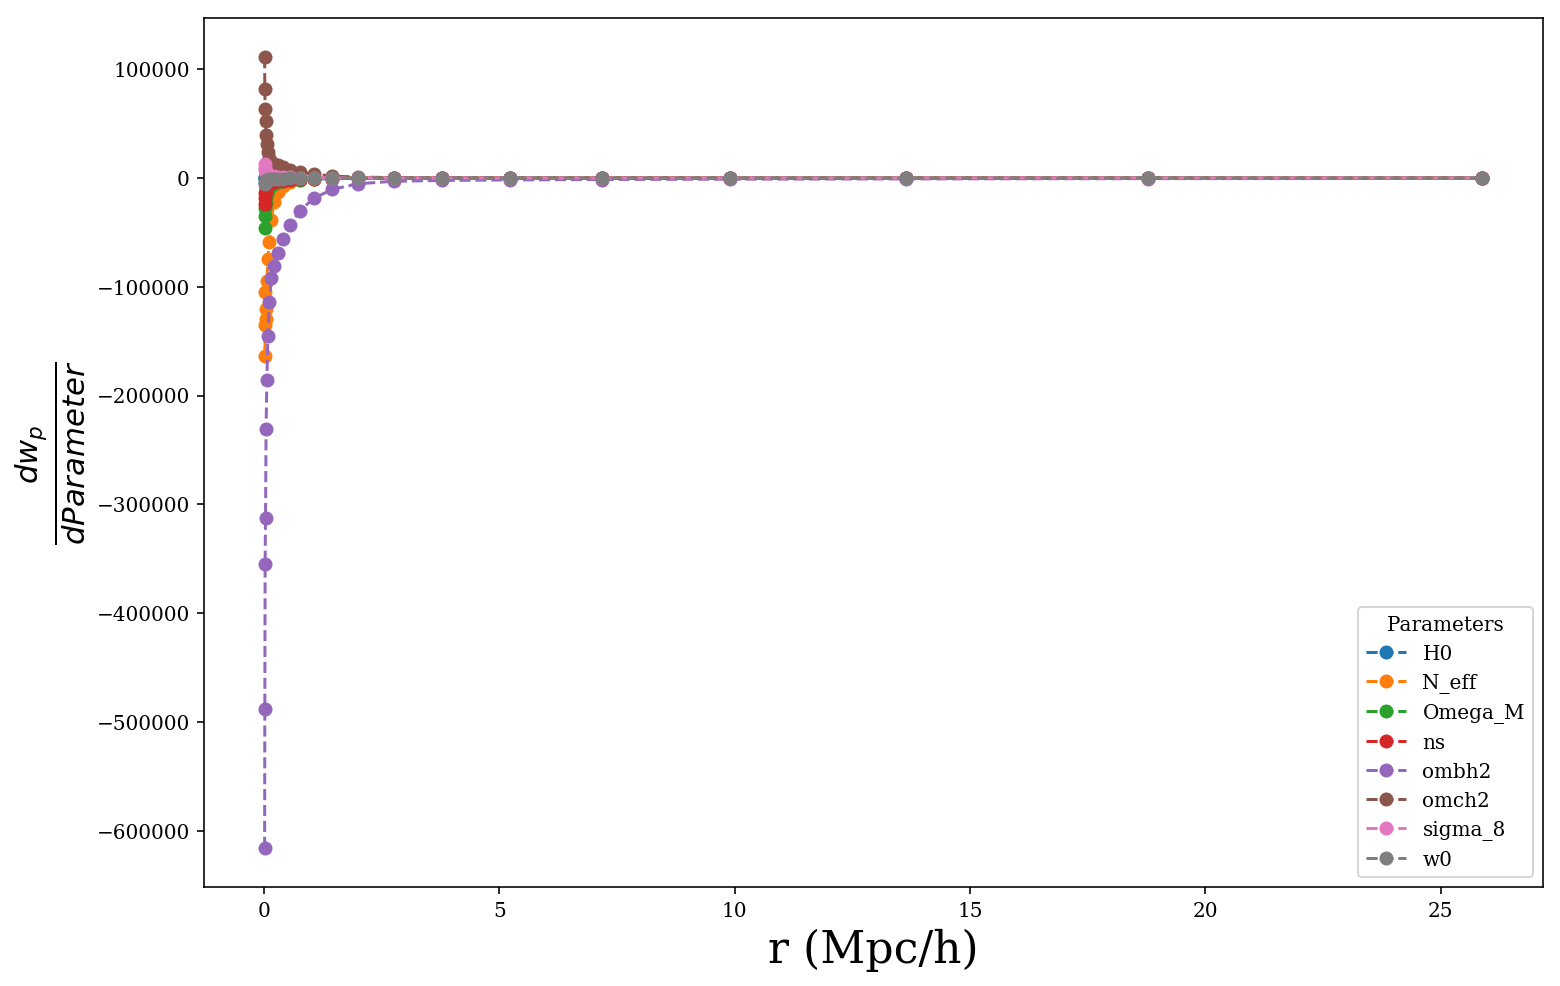

In [7]:
pl.figure(figsize=(12,8))

for i, param in enumerate(paramlist):
    pl.plot(statistic[0,:], derivative_matrix[i], 'o--', label=param)

pl.legend(title = 'Parameters')
pl.xlabel('r (Mpc/h)', fontsize=22)
pl.ylabel(r'$\frac{dw_p}{dParameter}$', fontsize=22)

### Fisher Matrix
$$\mathcal{F} = \mathcal{S^T}*\mathcal{C^{-1}}*\mathcal{S}$$  
$$Where,\, S_{ij} = \frac{\partial wp_i}{\partial\theta_j};\; and\: \mathcal{C}\: is\: correlation\: matrix$$

Using the original bins
Shape of derivative matrix = (7, 25)
Shape of correlation matrix = (25, 25)
Shape of fisher matrix = (7, 7)


array([[ 1.85104327e+01, -2.43569436e+03, -1.55839387e+03,
        -3.91087978e+04,  7.04591152e+03,  7.69607712e+02,
        -3.37884450e+02],
       [-2.43569436e+03,  3.27416365e+05,  1.98981253e+05,
         4.95914840e+06, -8.73112615e+05, -9.82899783e+04,
         4.36568135e+04],
       [-1.55839387e+03,  1.98981253e+05,  1.39236462e+05,
         3.49599326e+06, -6.41162654e+05, -6.73711683e+04,
         2.91757091e+04],
       [-3.91087978e+04,  4.95914840e+06,  3.49599326e+06,
         8.88552469e+07, -1.63599121e+07, -1.70646138e+06,
         7.36259703e+05],
       [ 7.04591152e+03, -8.73112615e+05, -6.41162654e+05,
        -1.63599121e+07,  3.10426641e+06,  3.16216273e+05,
        -1.34901739e+05],
       [ 7.69607712e+02, -9.82899783e+04, -6.73711683e+04,
        -1.70646138e+06,  3.16216273e+05,  3.32847087e+04,
        -1.43942032e+04],
       [-3.37884450e+02,  4.36568135e+04,  2.91757091e+04,
         7.36259703e+05, -1.34901739e+05, -1.43942032e+04,
         6.2615151

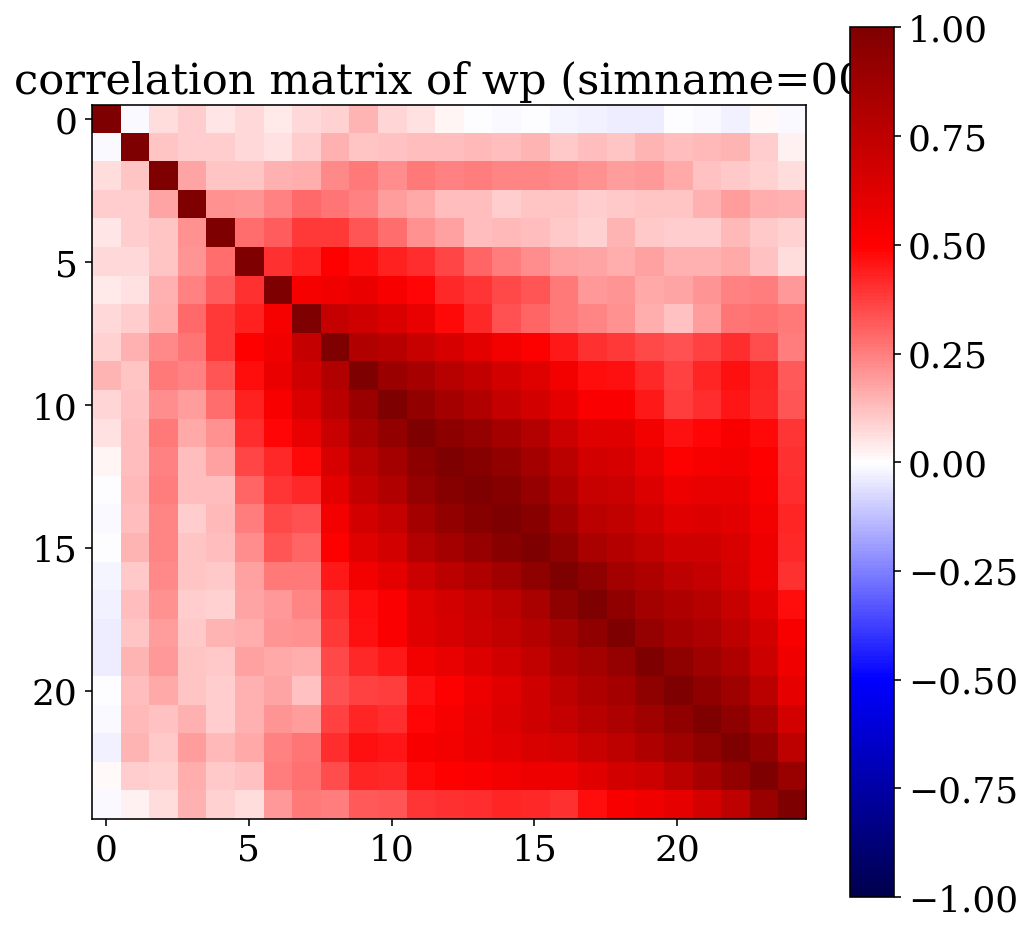

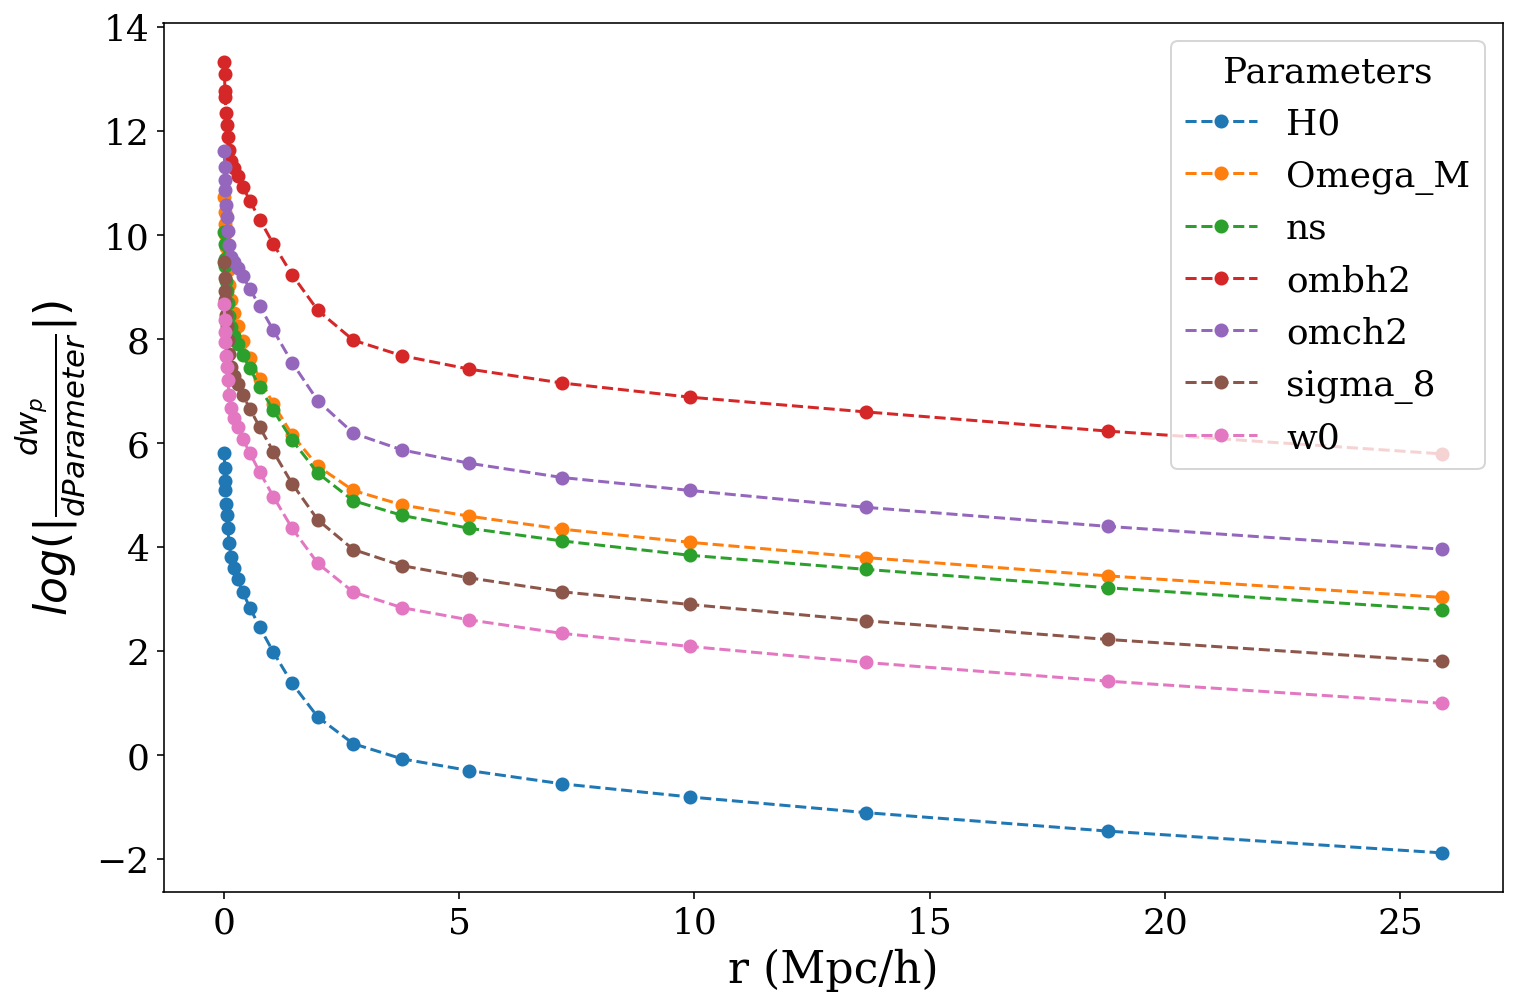

In [6]:
#15/05/2020 (Updated on 08/06/2020)
def generate_fisher_matrix(sim_dic, statlist, paramlist):
    '''
    Plot correlation matrix and generate Fisher matrix for given simulation
    Input:
    --------
    sim_dic: A dictionary with simulation parameters and xidata
    statlist: list of statistic functions
    paramlist: list of parameters of interest
    Return:
    --------
    Fisher matrix
    '''
    
    #Make a dictionary of xidata segregated by statistics
    seg = {}
    seg['wp'] = sim_dic['xidata'][sim_dic['beg_index']:sim_dic['beg_index']+sim_dic['nwp'],4:]
    for ii, pole in enumerate([0,2,4]):
        ind1 = sim_dic['beg_index'] + sim_dic['nwp'] + ii*(sim_dic['nssmall'] + sim_dic['nsxi'])
        ind2 = ind1 + sim_dic['nsxi'] + sim_dic['nssmall']
        seg['xi'+str(pole)] = sim_dic['xidata'][ind1:ind2,4:]
    
    pulm_cov = seg[statlist[0]]
    ts = statlist[0]
    for statistic in statlist[1:]:
        pulm_cov = np.row_stack([pulm_cov, seg[statistic]])
        ts = ts + ', ' + statistic
    
    cova = (sim_dic['njn']-1)*np.cov(pulm_cov)
    corr = np.copy(cova)
    for ii in range(0, cova.shape[0]):
        for jj in range(0, cova.shape[1]):
            corr[ii,jj] = cova[ii,jj]/(np.sqrt(cova[ii,ii])*np.sqrt(cova[jj,jj]))

    pl.figure(figsize=(8,8))
    pl.imshow(corr,vmin=-1,vmax=1,cmap='seismic')
    pl.colorbar()
    pl.title('correlation matrix of ' + ts + ' (simname=' + sim_dic['simname'] + ')')
    
    cova_inv = np.linalg.inv(cova)
    
    #Generate derivative matrix
    paramdict, statistic = generate_stat_matrix_paramdict(res_sims, simnum_list, paramlist, 
                                                          avg_index=None)

    derivative_matrix = []
    pl.figure(figsize=(12,8))
    for param, param_value in paramdict.items():
        derivative_list = fit_one_parameter(paramdict, param, statistic, order=1, 
                                            visualize=False)
        derivative_matrix.append(derivative_list)
        pl.plot(statistic[0,:], np.log(np.abs(derivative_list)), 'o--', label=param)
    
    pl.legend(title = 'Parameters')
    pl.xlabel('r (Mpc/h)', fontsize=22)
    pl.ylabel(r'$log(|\frac{dw_p}{dParameter}|)$', fontsize=22)
    
    derivative_matrix = np.array(derivative_matrix)
    
    temp1 = np.dot(derivative_matrix, cova_inv)
    fisher = np.dot(temp1, derivative_matrix.T)
    
    print("Shape of derivative matrix =", derivative_matrix.shape)
    print("Shape of correlation matrix =", cova_inv.shape)
    print("Shape of fisher matrix =", fisher.shape)
    return fisher
        
plank = res_sims[0]
paramlist = ['H0', 'Omega_M','ns', 'ombh2', 'omch2', 'sigma_8', 'w0']
generate_fisher_matrix(sim_dic=plank, statlist=['wp'], paramlist=paramlist)

### Confidence ellipses

In [7]:
#07/06/2020
from matplotlib.patches import Ellipse
from scipy.stats import norm

Using the original bins
Shape of derivative matrix = (3, 25)
Shape of correlation matrix = (25, 25)
Shape of fisher matrix = (3, 3)


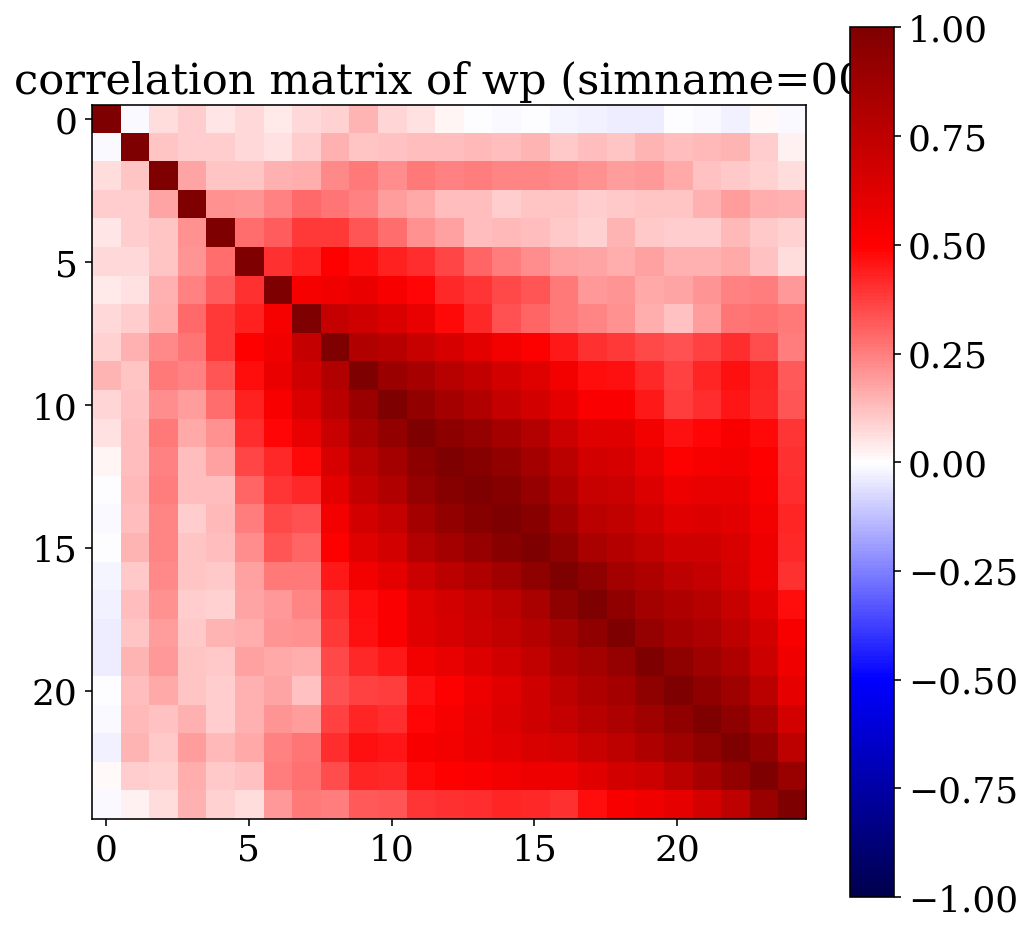

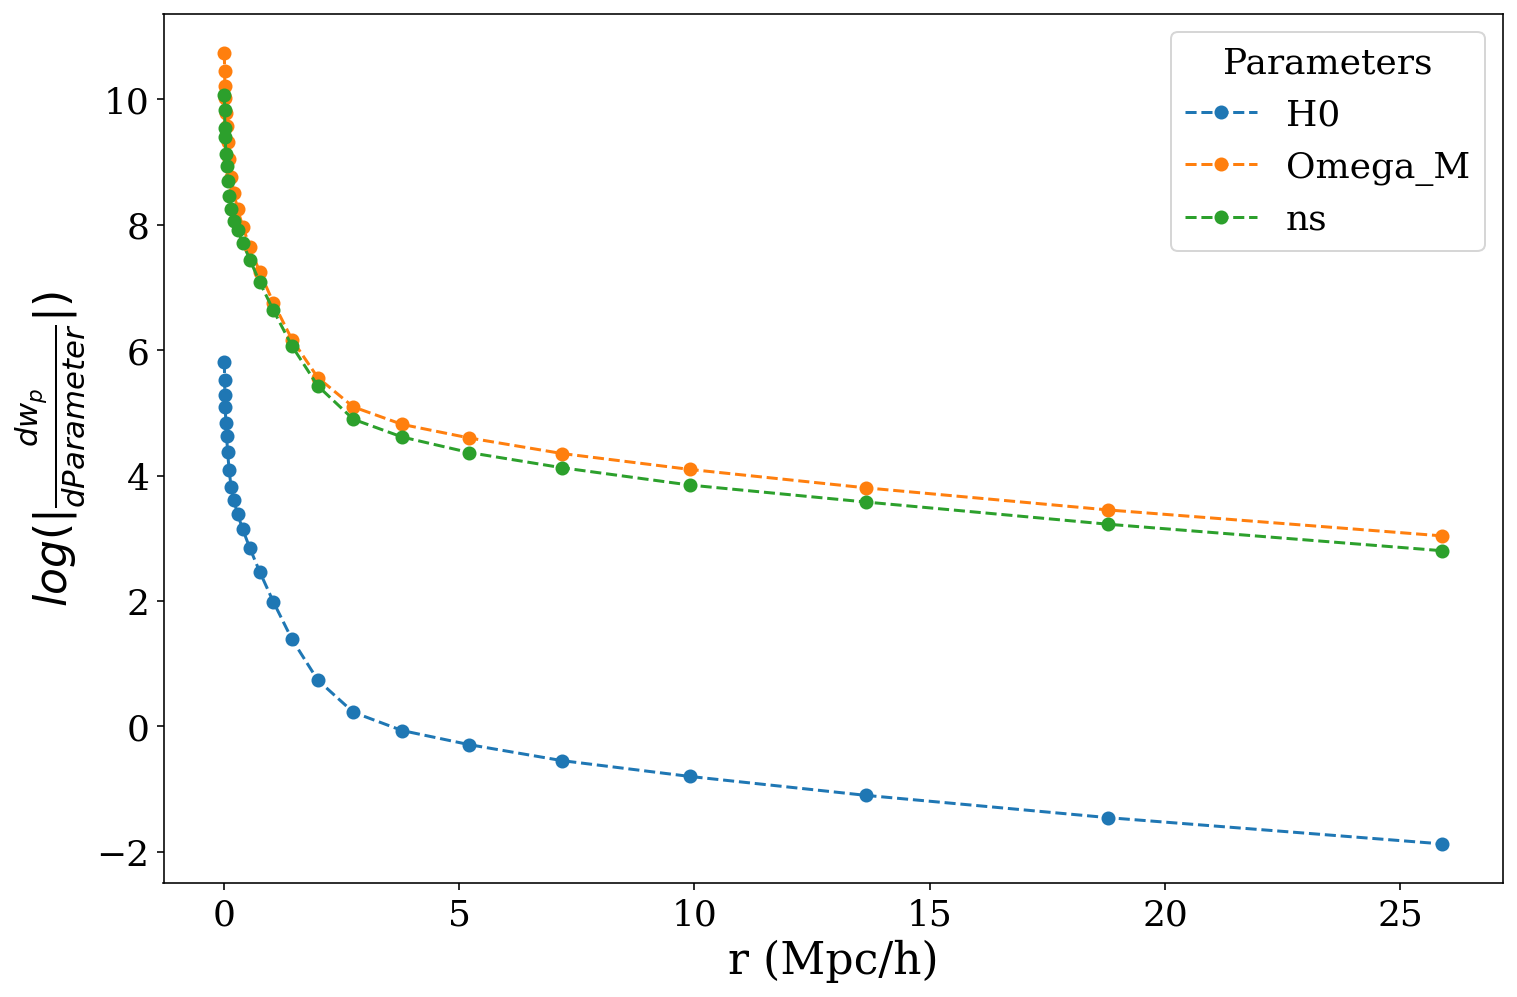

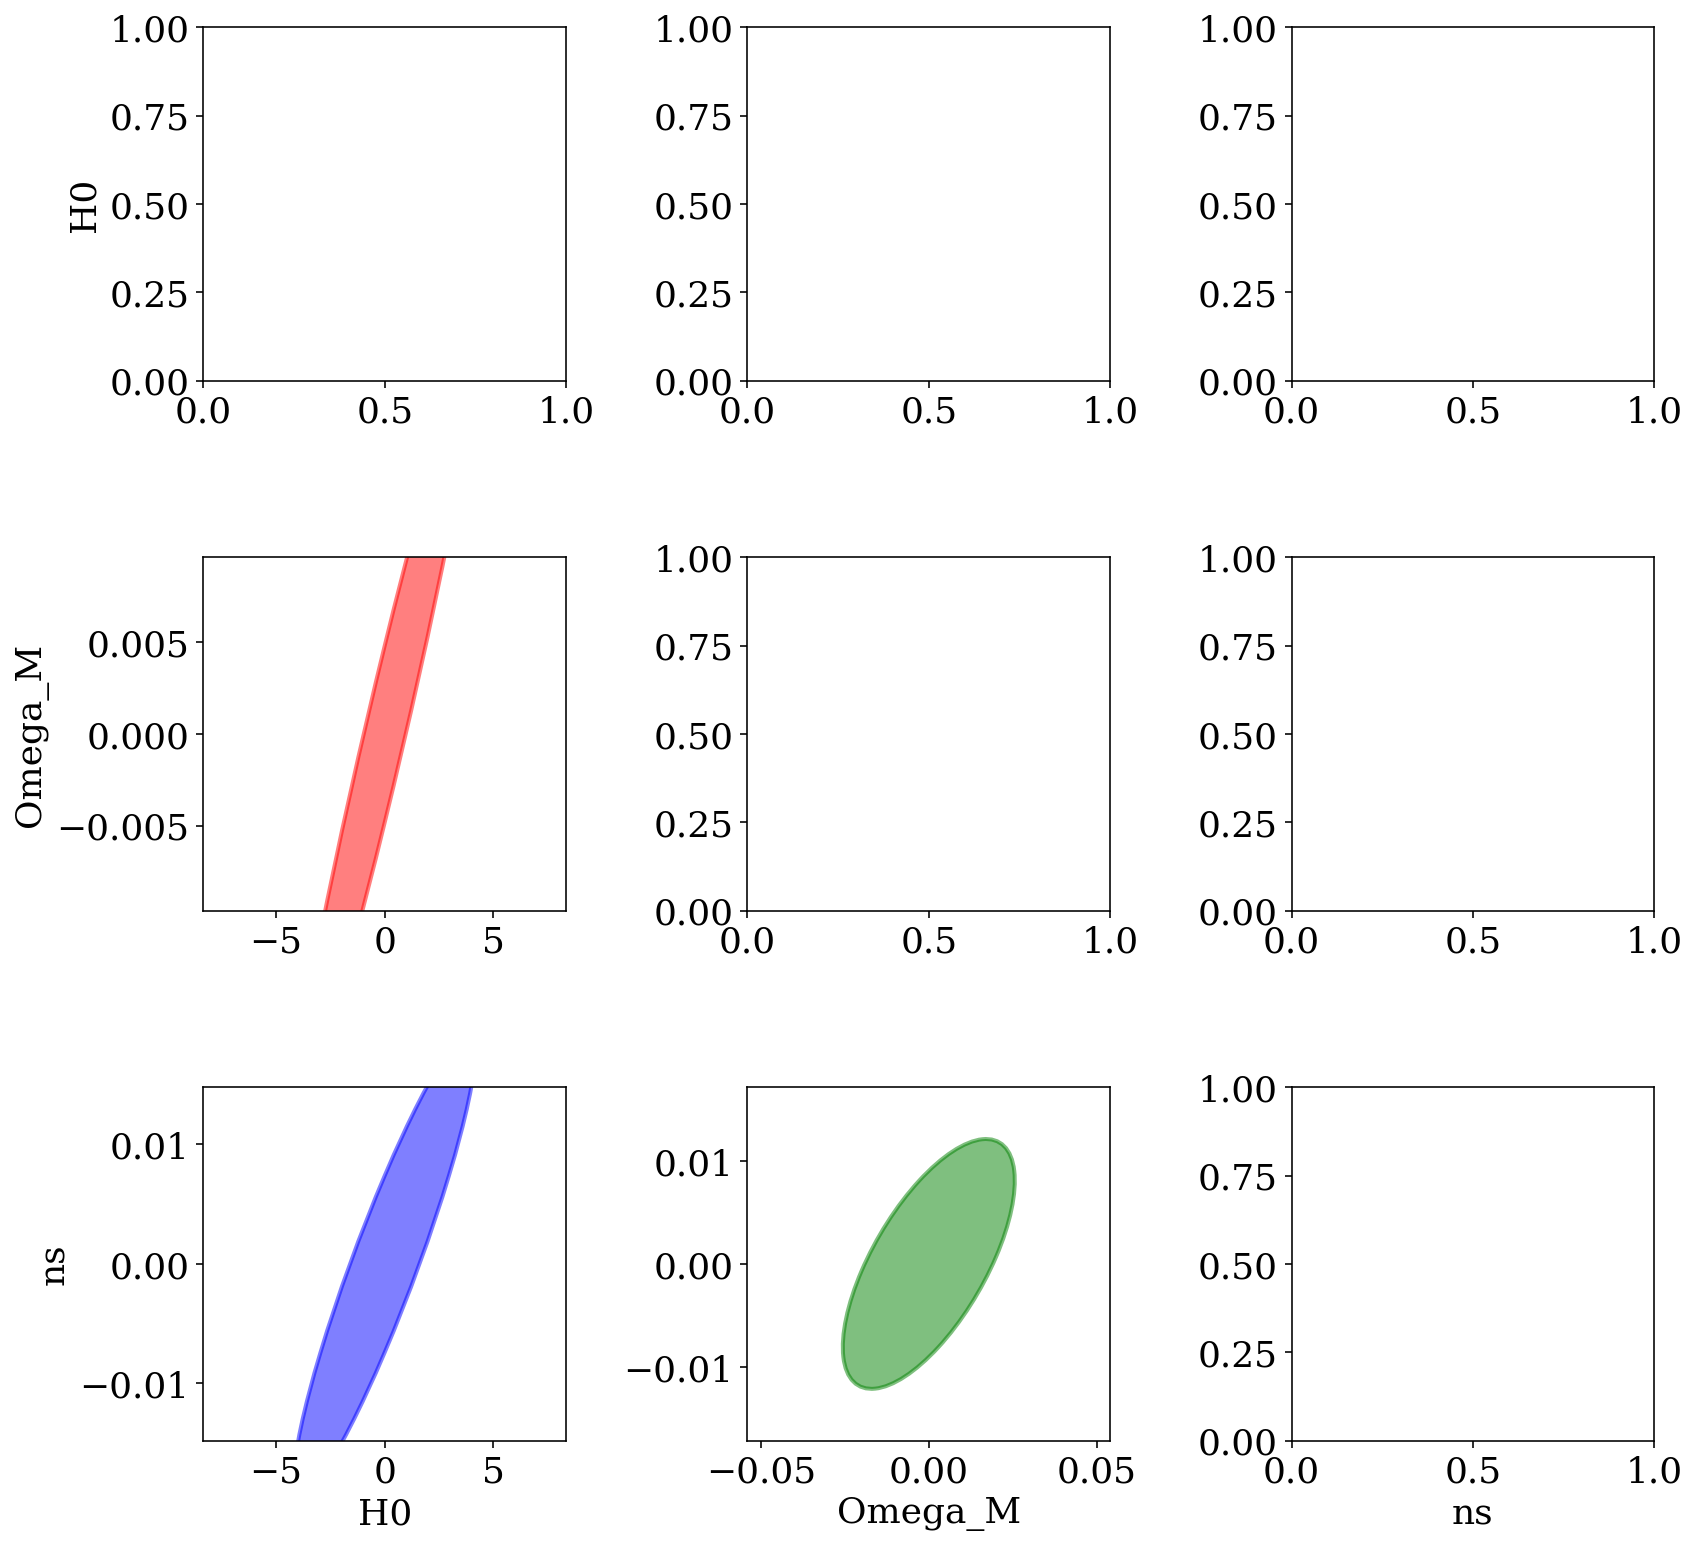

In [9]:
def get_ellparam(onlytwo, color):
    sigx_sq = onlytwo[0,0]
    sigy_sq = onlytwo[1,1]
    sigxy = onlytwo[1,0]
    sigyx = onlytwo[0,1]
    a_sq = (sigx_sq + sigy_sq)/2.0 + np.sqrt(pow(sigx_sq - sigy_sq, 2)/4.0 + pow(sigxy, 2))
    b_sq = (sigx_sq + sigy_sq)/2.0 - np.sqrt(pow(sigx_sq - sigy_sq, 2)/4.0 + pow(sigxy, 2))
    tan2t = (2.0*sigxy)/(sigx_sq + sigy_sq)
    theta = np.rad2deg(np.arctan(tan2t)/2.0)
    ellipse = Ellipse((0,0), width=2.0*np.sqrt(a_sq), height=2.0*np.sqrt(b_sq), angle=theta,
                 alpha=0.5, lw=2, color=color, ls='-')
    return ellipse, 2.0*np.sqrt(a_sq), 2.0*np.sqrt(b_sq)


plank = res_sims[0]
paramlist = ['H0', 'Omega_M','ns']
covmat = np.linalg.inv(generate_fisher_matrix(sim_dic=plank, statlist=['wp'], 
                                               paramlist=paramlist))

fig,ax=pl.subplots(3,3,sharex=False,sharey=False,figsize=(13,13))

onlytwo = covmat[0:2, 0:2]
ellipseparam = get_ellparam(onlytwo, 'red')
ax[1,0].add_patch(ellipseparam[0])
ax[1,0].set_xlim(-ellipseparam[1], ellipseparam[1])
ax[1,0].set_ylim(-ellipseparam[2], ellipseparam[2])

onlytwo = covmat[np.ix_([0,2], [0,2])]
ellipseparam = get_ellparam(onlytwo, 'blue')
ax[2,0].add_patch(ellipseparam[0])
ax[2,0].set_xlim(-ellipseparam[1], ellipseparam[1])
ax[2,0].set_ylim(-ellipseparam[2], ellipseparam[2])

onlytwo = covmat[1:3, 1:3]
ellipseparam = get_ellparam(onlytwo, 'green')
ax[2,1].add_patch(ellipseparam[0])
ax[2,1].set_xlim(-ellipseparam[1], ellipseparam[1])
ax[2,1].set_ylim(-ellipseparam[2], ellipseparam[2])

for i in range(len(paramlist)):
    ax[i,0].set(ylabel=paramlist[i])
    ax[2,i].set(xlabel=paramlist[i])

fig.subplots_adjust(wspace=0.5, hspace=0.5)
pl.show()